In [1]:
import requests
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# from sklearn.datasets import load_boston
# boston = load_boston()
# boston_data = pd.DataFrame(boston.data)
# boston_data.columns = boston.feature_names
# boston_data['PRICE'] = boston.target 
# # Adding target variable to dataframe
# # Median value of owner-occupied homes in $1000s
# boston_data.head()

In [3]:
url="https://raw.githubusercontent.com/CS521-2022-SC1/final-project-BelindaHZ/main/boston.csv"

In [4]:
file='download_example'

In [5]:
r=requests.get(url, allow_redirects=True)

In [6]:
open(file, 'wb').write(r.content)

41359

In [7]:
Boston = pd.read_csv('download_example')

Data from "kaggle.com/datasets/vikrishnan/boston-house-prices?datasetId=1815"

In [8]:
Boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


CRIM: per capita crime rate by town

ZN: proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS: proportion of non-retail business acres per town

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX: nitric oxides concentration (parts per 10 million)

RM: average number of rooms per dwelling

AGE: proportion of owner-occupied units built prior to 1940

DIS: weighted distances to ﬁve Boston employment centers

RAD: index of accessibility to radial highways

TAX: full-value property-tax rate per $10,000

PTRATIO: pupil-teacher ratio by town 

B: 1000(Bk−0.63)^2 where Bk is the proportion of blacks by town

LSTAT: % lower status of the population

MEDV: Median value of owner-occupied homes in $1000s We can see that the input attributes have a mixture of units.

In [9]:
Boston.shape

(506, 14)

In [10]:
Boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [11]:
Boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [12]:
Boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [13]:
Boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [14]:
# Rename MEDV to Traget price since we need to predict it in further step
Boston = Boston.rename(columns={'MEDV': 'Target_Price'})
Boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target_Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


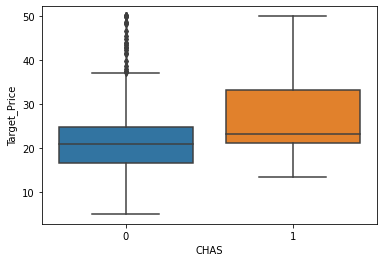

In [15]:
sns.boxplot(x = 'CHAS', y = 'Target_Price', data = Boston);

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(Boston)
data_normalized = scaler.transform(Boston)
Boston_norm = pd.DataFrame(data = data_normalized, index = Boston.index, columns = Boston.columns)
Boston_norm.round(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target_Price
0,-0.420,0.285,-1.288,-0.273,-0.144,0.414,-0.120,0.140,-0.983,-0.667,-1.459,0.441,-1.076,0.160
1,-0.417,-0.488,-0.593,-0.273,-0.740,0.194,0.367,0.557,-0.868,-0.987,-0.303,0.441,-0.492,-0.102
2,-0.417,-0.488,-0.593,-0.273,-0.740,1.283,-0.266,0.557,-0.868,-0.987,-0.303,0.396,-1.209,1.324
3,-0.417,-0.488,-1.307,-0.273,-0.835,1.016,-0.810,1.078,-0.753,-1.106,0.113,0.416,-1.362,1.183
4,-0.412,-0.488,-1.307,-0.273,-0.835,1.229,-0.511,1.078,-0.753,-1.106,0.113,0.441,-1.027,1.488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413,-0.488,0.116,-0.273,0.158,0.439,0.019,-0.626,-0.983,-0.803,1.176,0.387,-0.418,-0.014
502,-0.415,-0.488,0.116,-0.273,0.158,-0.235,0.289,-0.717,-0.983,-0.803,1.176,0.441,-0.501,-0.210
503,-0.413,-0.488,0.116,-0.273,0.158,0.985,0.797,-0.774,-0.983,-0.803,1.176,0.441,-0.983,0.149
504,-0.408,-0.488,0.116,-0.273,0.158,0.726,0.737,-0.668,-0.983,-0.803,1.176,0.403,-0.865,-0.058


We decided to standardize the variables. Since some variables are not in the same unit or same scale, it will not make sense to make direct comparisons. 

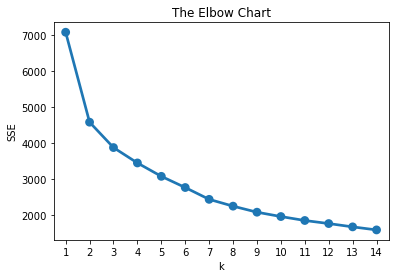

In [17]:
from sklearn.cluster import KMeans
# E. Elbow chart
sse = {}
for k in range(1, 15):    #Note -- we can adjust this range!
# Initialize KMeans with k clusters
    kmeans = KMeans(n_clusters=k, random_state=521)
# Fit KMeans on the normalized dataset
    kmeans.fit(Boston_norm)
    sse[k] = kmeans.inertia_
# Add the plot title "The Elbow Method"
plt.title('The Elbow Chart')
# Add X-axis label "k"
plt.xlabel('k')
# Add Y-axis label "SSE"
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()));

In [18]:
import pandas as pd
import numpy as np
Boston_data = pd.read_csv("./boston.csv")
for k, v in Boston_data.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(Boston_data)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column MEDV outliers = 7.91%


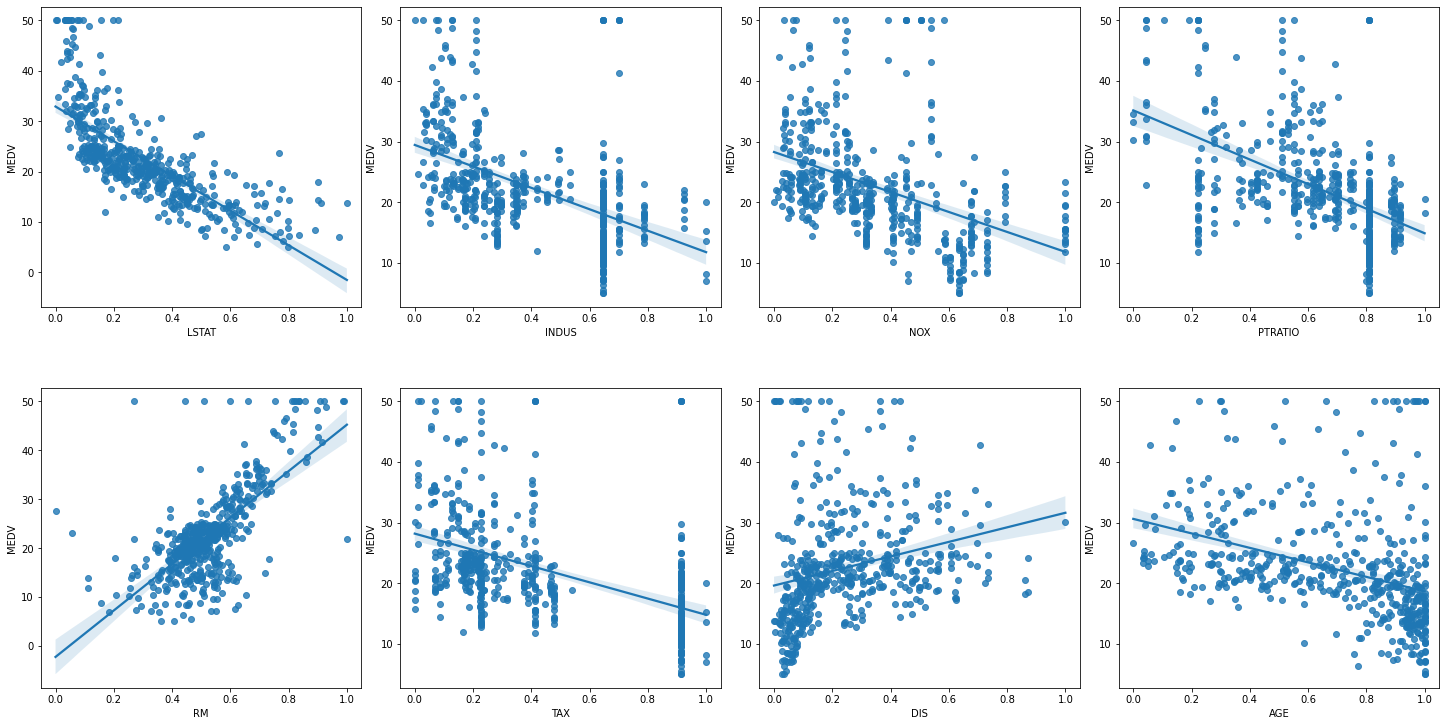

In [19]:
from sklearn import preprocessing
# Let's scale the columns before plotting them against MEDV
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
x = Boston_data.loc[:,column_sels]
y = Boston_data['MEDV']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)